In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
authors = pd.read_csv("../data/authors.csv")
authors.sample(10)

,Unnamed: 0,username,comment,created_utc,score,collected_date,name
6700,6700,drfritz2,Podemos estufar o peito e dizer: agentes estat...,2022-02-04 22:47:03+00:00,1,2022-03-06 02:37:03.566484+00:00,BrasildoB
9505,9505,ToguroSenpai,Não deixe o estado controlar a indústria do pe...,2021-08-16 15:28:33+00:00,30,2022-04-17 01:55:45.109854+00:00,BrasildoB
13674,13674,piperman_,É o tipo de coisa que não vai acontecer. Armas...,2022-03-01 21:54:34+00:00,3,2022-04-17 04:45:52.210995+00:00,brasilivre
18706,18706,um--no,"Eu li ""Coelho"" na imagem da direita e pensei q...",2020-05-07 09:24:12+00:00,3,2022-04-17 08:15:32.715546+00:00,BrasildoB
3433,3433,drfritz2,Agora o petê francês foi longe demais. Agora n...,2022-01-24 15:40:33+00:00,0,2022-02-17 00:00:00,brasilivre
3046,3046,AlehCemy,A explosão foi tão violenta que fez o carro su...,2021-12-21 14:17:36+00:00,6,2022-02-17 00:00:00,brasil
13141,13141,piperman_,His channel has the video with the whole proce...,2022-04-11 00:08:36+00:00,1,2022-04-17 04:26:54.067098+00:00,NaN
449,449,Supermunch2000,Cuidado com os floquinhos de neve sensíveis!,2022-02-01 09:35:14+00:00,15,2022-02-17 00:00:00,brasil
17750,17750,TheGza1,Só sei que quando era moleque fiquei esperando...,2021-07-03 23:02:34+00:00,4,2022-04-17 07:09:59.120698+00:00,brasil
17259,17259,TheGza1,Plot twist: o cara trabalha na empresa que fab...,2022-01-31 00:45:54+00:00,6,2022-04-17 06:56:43.339214+00:00,brasil


In [111]:
authors = authors[authors.username.isin(["MidnightRider00", "TheGza1"])]
authors = authors[["comment", "username"]]
authors.sample()

,comment,username
6414,Como se tu tivesse dado um. \n\nDei exemplo de...,MidnightRider00


In [112]:
authors = shuffle(authors, random_state=42)
authors.reset_index(inplace=True)
authors.head(10)

,index,comment,username
0,6281,The shill will probably not answer this. Dude ...,MidnightRider00
1,17357,"Resumo: o PT vai usar a tática do ""MAS E O PT?...",TheGza1
2,6327,Continua sendo baseado em baseado \n\nEdit: e ...,MidnightRider00
3,6197,Uma coisa é ser expulso por uma divergência aq...,MidnightRider00
4,6183,Jones provavelmente já fez mais pela esquerda ...,MidnightRider00
5,17258,Existe uma regra que diz que os títulos das ma...,TheGza1
6,5735,"> pessoas\n\nCrianças, no caso.",MidnightRider00
7,17429,"Cada coisa que o pessoal inventa, PQP ಠ_ಠ",TheGza1
8,17275,PQP os caras conseguem...,TheGza1
9,17340,/façamesofrer,TheGza1


In [113]:
authors.drop("index", axis=1, inplace=True)
authors.head()

,comment,username
0,The shill will probably not answer this. Dude ...,MidnightRider00
1,"Resumo: o PT vai usar a tática do ""MAS E O PT?...",TheGza1
2,Continua sendo baseado em baseado \n\nEdit: e ...,MidnightRider00
3,Uma coisa é ser expulso por uma divergência aq...,MidnightRider00
4,Jones provavelmente já fez mais pela esquerda ...,MidnightRider00


In [114]:
X = authors["comment"]
y = authors["username"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [115]:
vect = CountVectorizer(max_features=100)
vect.fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

In [116]:
X_train = X_train.toarray()

In [117]:
X_train = pd.DataFrame(X_train, columns=vect.vocabulary_.keys())
X_train

,não,nada,aí,as,se,eu,de,os,que,mas,...,sobre,tempo,país,pra,bem,quando,dia,anos,you,contra
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,0,0,2,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,9
1511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train.sum().sort_values()

cara       56
não        57
as         58
https      58
to         58
         ... 
isso      609
bem       662
is        941
com      1589
até      2033
Length: 100, dtype: int64

# Informação mútua

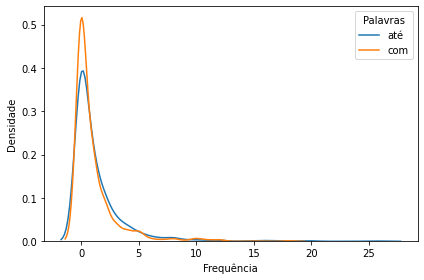

In [119]:
ax = sns.kdeplot(X_train["até"])
ax = sns.kdeplot(X_train["com"])
ax.legend(title='Palavras', labels=['até', 'com'])
ax.set(xlabel="Frequência", ylabel="Densidade")
plt.tight_layout()
plt.show()

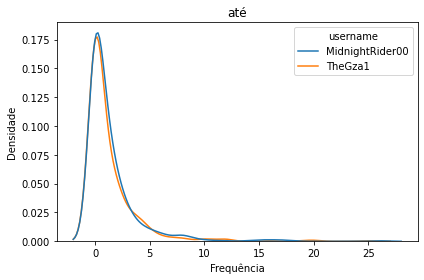

In [120]:
ax = sns.kdeplot(X_train["até"], hue=y)
ax.set(xlabel="Frequência", ylabel="Densidade", title="até")
plt.tight_layout()
plt.show()

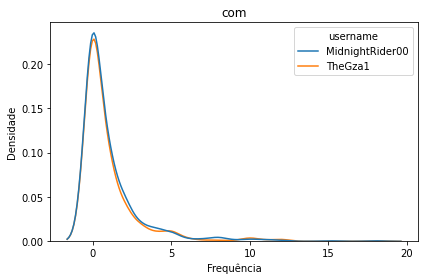

In [121]:
ax = sns.kdeplot(X_train["com"], hue=y)
ax.set(xlabel="Frequência", ylabel="Densidade", title="com")
plt.tight_layout()
plt.show()

In [122]:
mutual_info = mutual_info_classif(X_train, y_train)
len(mutual_info)

100

In [103]:
X_train.columns[mutual_info.argsort()[-10:]]

Index(['do', 'aqui', 'tipo', 'na', 'com', 'até', 'sobre', 'contra', 'quem',
       'anos'],
      dtype='object')

In [106]:
X = authors["comment"]
y = authors["username"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
    
vect = CountVectorizer()
vect.fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)
X_train = X_train.toarray()

X_train = pd.DataFrame(X_train, columns=vect.vocabulary_.keys())
X_train

,não,vi,nada,gay,aí,pq,as,bolas,estão,se,...,caíram,apontei,estranhas,magicamente,menino,ney,noções,achado,portar,transando
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
X_train.sum().sort_values()

video                                                  1
teto                                                   1
expôs                                                  1
dcm                                                    1
ineficaz                                               1
                                                    ... 
envolveu                                             609
chicago_boys_serious_business_no_brasil_meme_nos     662
assassinar                                           941
mistaken                                            1589
balassa                                             2033
Length: 9997, dtype: int64

In [108]:
mutual_info = mutual_info_classif(X_train, y_train)
len(mutual_info)

9997

In [123]:
X_train.columns[mutual_info.argsort()[-10:]]

Index(['pelo', 'dos', 'com', 'mesmo', 'is', 'ou', 'tinha', 'china', 'quem',
       'anos'],
      dtype='object')

In [127]:
mutual_info[mutual_info.argsort()[-10:]]

array([0.02688551, 0.02895209, 0.03013526, 0.03103803, 0.03138438,
       0.03219951, 0.03413876, 0.0364418 , 0.04112234, 0.05639012])

In [137]:
corr_bi = X_train.corr().abs().unstack().sort_values()

In [188]:
correlation = pd.DataFrame(corr_bi.reset_index())
correlation.columns=["token1", "token2", "correlation"]
top_corr = correlation[(correlation.correlation >= 0.75) & (correlation.correlation <= 0.999)]
top_corr

,token1,token2,correlation
9888,brasil,sobre,0.758227
9889,sobre,brasil,0.758227
9890,brasil,aqui,0.768674
9891,aqui,brasil,0.768674
9892,sobre,tipo,0.771732
9893,tipo,sobre,0.771732
9894,mesmo,aqui,0.800347
9895,aqui,mesmo,0.800347
9896,aí,aqui,0.815137
9897,aqui,aí,0.815137


In [187]:
top_corr.sample(124)

,token1,token2,correlation
9816,mesmo,ou,0.569278
9802,and,is,0.554971
9880,aí,brasil,0.724595
9819,anos,is,0.572121
9779,por,bem,0.504315
...,...,...,...
9843,tipo,ou,0.620987
9817,ou,mesmo,0.569278
9825,sobre,ter,0.586901
9794,and,até,0.527582


In [189]:
all_authors = authors = pd.read_csv("../data/authors.csv")

In [199]:
dupli = all_authors[all_authors.comment.duplicated()]
dupli = dupli[["username", "comment"]]
dupli = dupli.sort_values("comment")

In [201]:
dupli.to_csv("duplicated.csv", sep="\t")

Verificar consistência -> duplicatas